#### Logistic Regression

In [2]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [4]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: title={'center': 'Count Plot for spices'}, xlabel='species'>

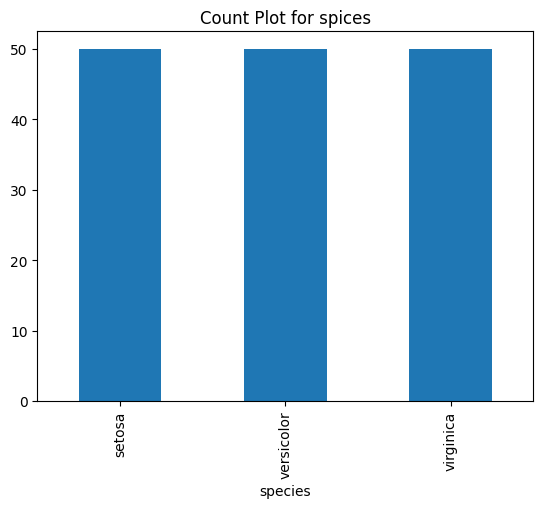

In [11]:
df['species'].value_counts().plot(kind='bar',title='Count Plot for spices')

In [12]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [13]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [16]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
Y['species'] = lb.fit_transform(Y['species'])
Y['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [18]:
Y.value_counts()

species
0          50
1          50
2          50
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [22]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                          ('scaler',StandardScaler())])

In [27]:
X_pre = num_pipe.fit_transform(X)
X_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [28]:
cols = num_pipe.get_feature_names_out()

In [29]:
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [31]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [47]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,  ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=44)


In [48]:
xtrain.shape

(100, 4)

In [49]:
xtest.shape

(50, 4)

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [53]:
model.score(xtrain, ytrain)

0.97

In [54]:
model.score(xtest,ytest)

0.96

In [55]:
ypretr = model.predict(xtrain)
yprets = model.predict(xtest)

In [61]:
ytrain.head()

,species
19,0
35,0
136,2
30,0
127,2


In [60]:
ypretr[0:5]

array([0, 0, 2, 0, 2])

In [59]:
yprets[0:5]

array([2, 0, 1, 1, 2])

In [63]:
ytest.head()

,species
144,2
9,0
79,1
95,1
104,2


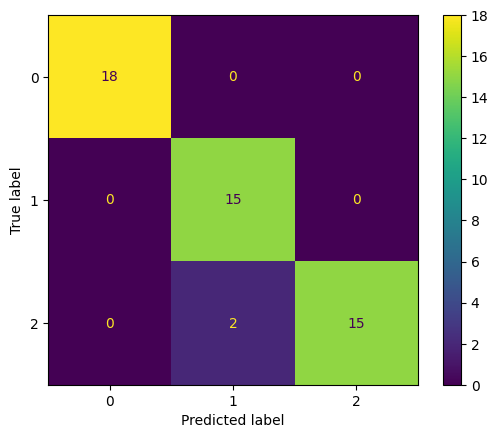

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,yprets)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()


In [70]:
from sklearn.metrics import classification_report
cr = print(classification_report(yprets,ytest))
cr

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.88      0.94        17
           2       0.88      1.00      0.94        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [71]:
ypretr_lb = lb.inverse_transform(ypretr)
yprets_lb = lb.inverse_transform(yprets)

In [72]:
ypretr_lb

array(['setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'versic

In [73]:
yprets_lb

array(['virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'setosa', 'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor'], dtype=object)